In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
  # Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=78d6bd24e551c8ca757a7ade0a25f106


In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sainte-marie
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | sestri levante
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | strezhevoy
Processing Record 12 of Set 1 | burica
City not found. Skipping...
Processing Record 13 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | balykshi
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | rikitea
Processing Recor

Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | saleaula
City not found. Skipping...
Processing Record 39 of Set 4 | puerto carreno
Processing Record 40 of Set 4 | villamontes
Processing Record 41 of Set 4 | manicore
Processing Record 42 of Set 4 | willowmore
Processing Record 43 of Set 4 | mont-de-marsan
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | ibra
Processing Record 46 of Set 4 | zhigalovo
Processing Record 47 of Set 4 | maceio
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | labytnangi
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | muscatine
Processing Record 6 of Set 5 | ayios kirikos
City not found. Skipping...
Processing Record 7 of Set 5 | mezhdu

Processing Record 25 of Set 8 | kawalu
Processing Record 26 of Set 8 | shakiso
Processing Record 27 of Set 8 | villa carlos paz
Processing Record 28 of Set 8 | tsiroanomandidy
Processing Record 29 of Set 8 | storsteinnes
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | nhulunbuy
Processing Record 32 of Set 8 | muroto
Processing Record 33 of Set 8 | marathon
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | sulangan
Processing Record 36 of Set 8 | martapura
Processing Record 37 of Set 8 | tayu
Processing Record 38 of Set 8 | desaguadero
Processing Record 39 of Set 8 | vinstra
Processing Record 40 of Set 8 | skjervoy
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | kegayli
City not found. Skipping...
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | fare
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | leshukonskoye
Proce

Processing Record 12 of Set 12 | okha
Processing Record 13 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 14 of Set 12 | hovd
Processing Record 15 of Set 12 | bereda
Processing Record 16 of Set 12 | mitsamiouli
Processing Record 17 of Set 12 | yangambi
Processing Record 18 of Set 12 | high level
Processing Record 19 of Set 12 | oussouye
Processing Record 20 of Set 12 | nizhniy ingash
Processing Record 21 of Set 12 | bomet
Processing Record 22 of Set 12 | beringovskiy
Processing Record 23 of Set 12 | matay
Processing Record 24 of Set 12 | los rastrojos
Processing Record 25 of Set 12 | koutiala
Processing Record 26 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 27 of Set 12 | lompoc
Processing Record 28 of Set 12 | malwan
City not found. Skipping...
Processing Record 29 of Set 12 | myitkyina
Processing Record 30 of Set 12 | berlevag
Processing Record 31 of Set 12 | beipiao
Processing Record 32 of Set 12 | kloulklubed
Processing Record 33 of Set

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sainte-Marie,-20.8968,55.5496,75.33,67,100,13.80,RE,2022-12-05 22:22:17
1,Clyde River,70.4692,-68.5914,14.23,92,100,6.91,CA,2022-12-05 22:22:17
2,Ushuaia,-54.8000,-68.3000,44.26,53,40,20.71,AR,2022-12-05 22:22:18
3,Mataura,-46.1927,168.8643,50.49,90,97,3.51,NZ,2022-12-05 22:22:18
4,Katsuura,35.1333,140.3000,44.62,95,100,20.13,JP,2022-12-05 22:22:18
5,East London,-33.0153,27.9116,60.28,85,4,11.05,ZA,2022-12-05 22:22:15
6,Esperance,-33.8667,121.9000,60.93,81,100,5.01,AU,2022-12-05 22:22:19
7,Sestri Levante,44.2732,9.3968,53.06,89,15,5.01,IT,2022-12-05 22:22:19
8,New Norfolk,-42.7826,147.0587,55.92,58,93,4.00,AU,2022-12-05 22:22:20
9,Qaanaaq,77.4840,-69.3632,33.39,87,100,16.82,GL,2022-12-05 22:20:48


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1670280940.6848164

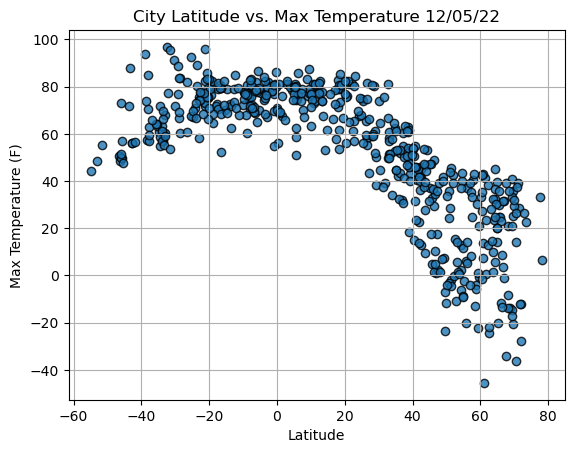

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

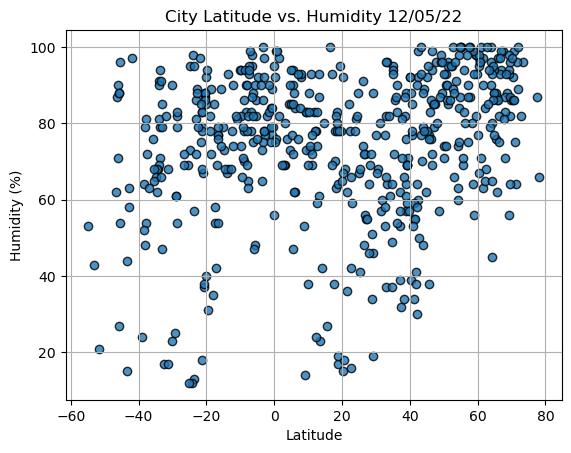

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

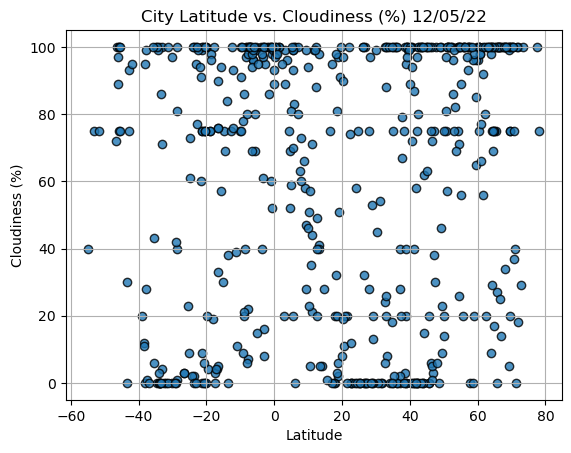

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

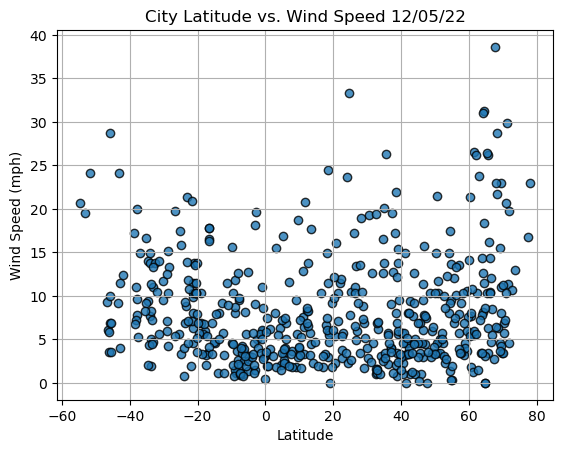

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()